In [1]:
from skimage import io
from skimage import transform
import skimage
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline


(256, 256, 4)
(256, 256, 3)
EVI
14.847381523
18.0820374127
12.8420146535
NDVI
(256, 256)
5.91227722168
6
5
ARVI
(256, 256)
4477.76502991
5399
3764
(256, 256, 7)


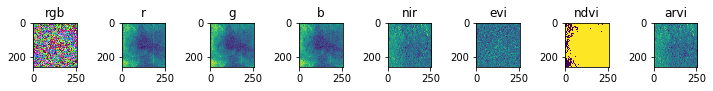

In [45]:

name = 'train_1140'
i1 = io.imread('train-tif/'+name+'.tif') 
#i2 = io.imread('train-jpg/'+name+'.jpg')
print (i1.shape)

irgb = i1[:,:,0:3]
print (irgb.shape)

r = i1[:,:,0]
g = i1[:,:,1]
b = i1[:,:,2]
nir = i1[:,:,3]

print ('EVI')
evi = 2.5 * (nir - r) / (nir + 6 * r - 7.5 * b + 1)
print (np.mean(evi))
print (np.max(evi))
print (np.min(evi))

print ('NDVI')
ndvi = (nir -r) / (nir + r)
print (ndvi.shape)
print (np.mean(ndvi))
print (np.max(ndvi))
print (np.min(ndvi))

print ('ARVI')
arvi = (nir - (2*r-b) / (nir+(2*r+b)))
print (ndvi.shape)
print (np.mean(arvi))
print (np.max(arvi))
print (np.min(arvi))

i1 = np.dstack((i1, evi,ndvi,arvi))
print (i1.shape)


fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(10,10))
#                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(irgb)
ax[0].set_title("rgb")
ax[1].imshow(r)
ax[1].set_title("r")
ax[2].imshow(g)
ax[2].set_title("g")
ax[3].imshow(b)
ax[3].set_title("b")
ax[4].imshow(nir)
ax[4].set_title("nir")
ax[5].imshow(evi)
ax[5].set_title("evi")
ax[6].imshow(ndvi)
ax[6].set_title("ndvi")
ax[7].imshow(arvi)
ax[7].set_title("arvi")

plt.tight_layout()
plt.show()

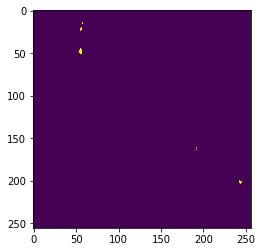

In [33]:
plt.imshow(ndvi)